In [1]:
import plotly.express as px

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os

df = pd.read_csv("/content/drive/MyDrive/Country-data.csv") # Load the data into a DataFrame
 # Store the DataFrame in the list

# List of preprocessing steps
lst = [df.head(), df.duplicated().sum(), df.isnull().sum(), df.dtypes, df.describe()]

# List of preprocessing descriptions
lst_prep = ['The first 5 rows', 'Number of duplicated rows', 'Number of NaN values in each column', 'Column types', 'Statistics for each column']

# Preprocessing results for each DataFrame
for i, j in zip(lst, lst_prep):
    print(f"{j} is: \n{i}\n\n")

The first 5 rows is: 
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


Number of duplicated rows is: 
0


Number of NaN values in each column is: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


Column types is: 
coun

In [4]:
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
categorical_variables_df=df[categorical_variables]


numerical_variables=[var for var in df.columns if var not in categorical_variables]
numerical_variables_df=df[numerical_variables]

____________________________________________________________________________________________________


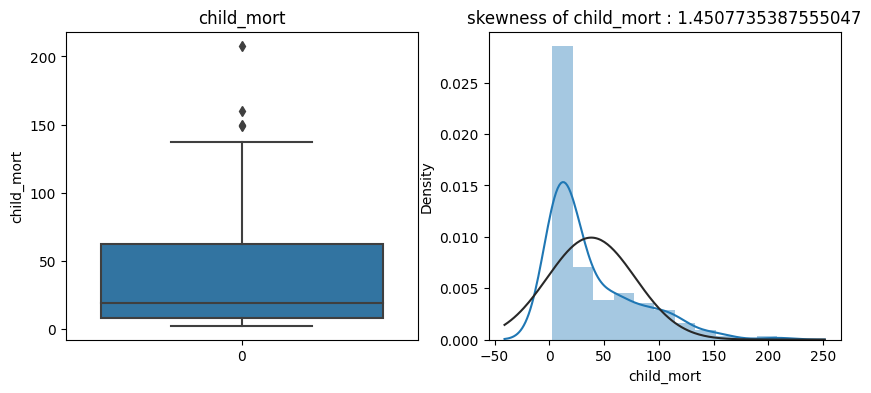

____________________________________________________________________________________________________


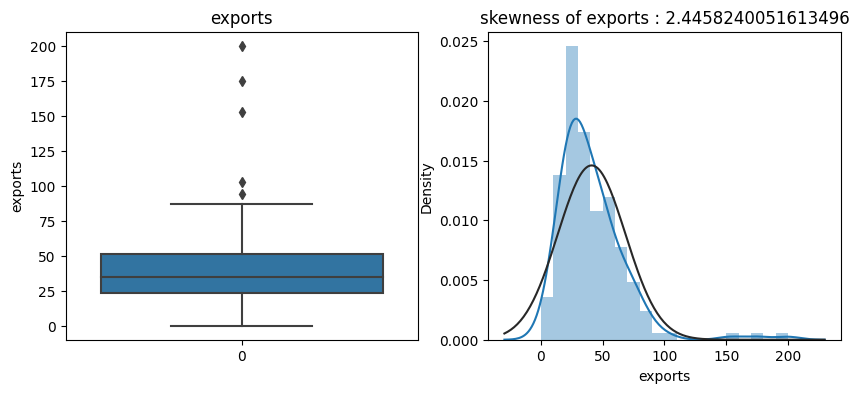

____________________________________________________________________________________________________


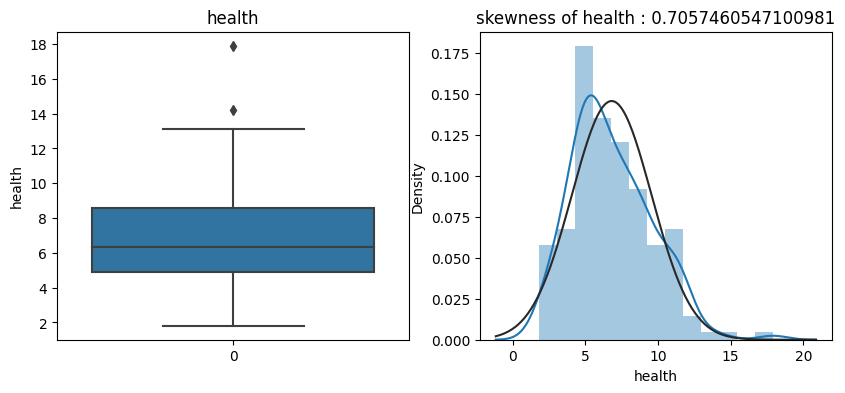

____________________________________________________________________________________________________


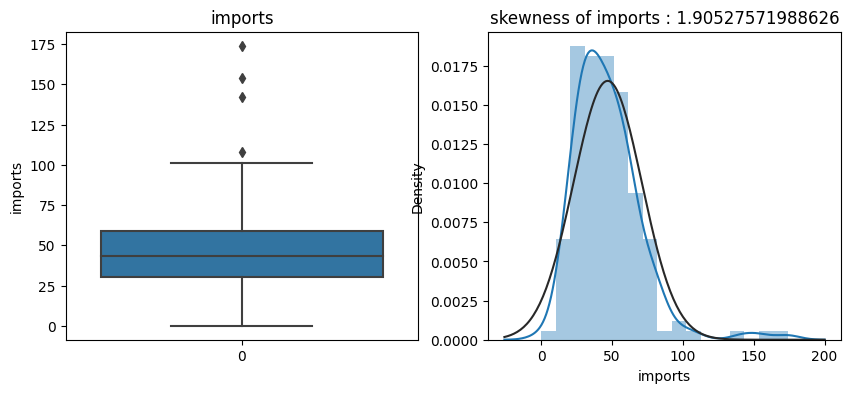

____________________________________________________________________________________________________


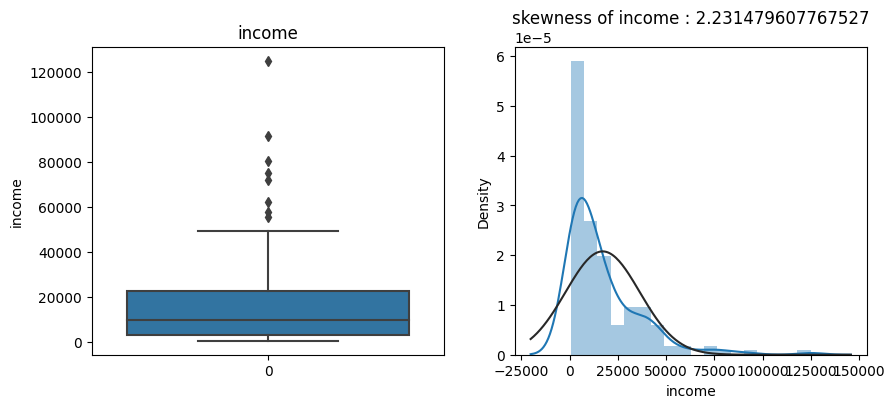

____________________________________________________________________________________________________


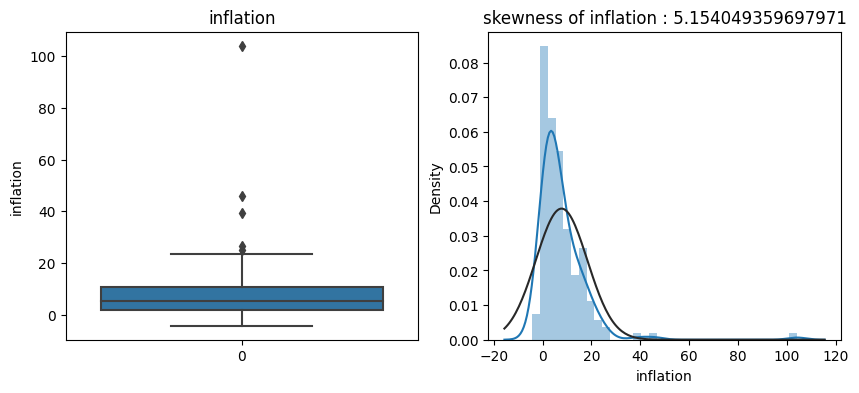

____________________________________________________________________________________________________


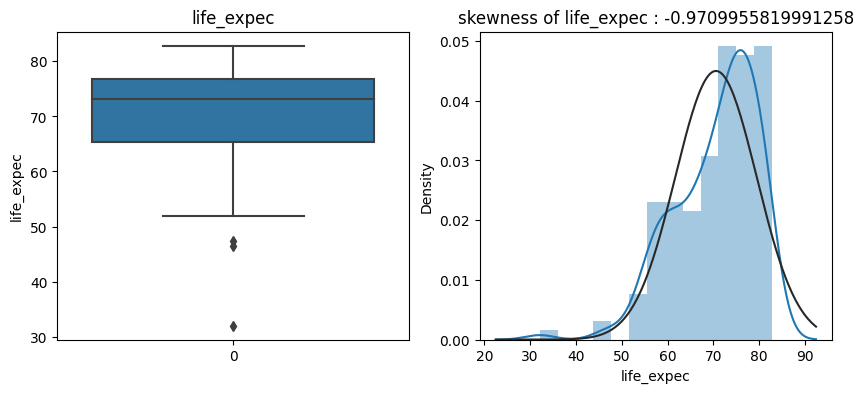

____________________________________________________________________________________________________


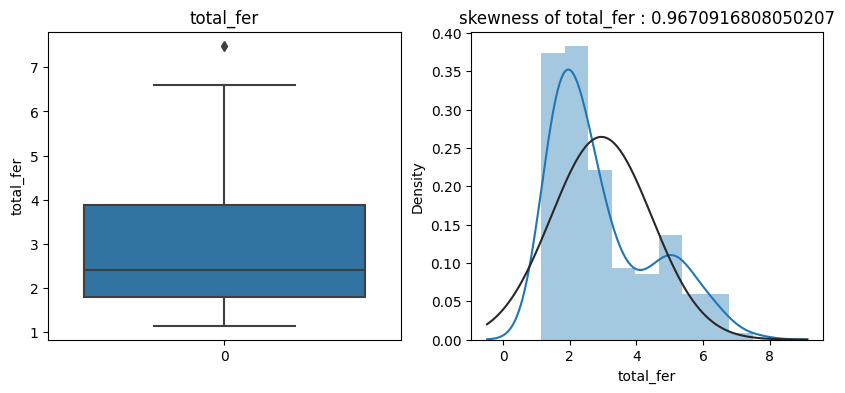

____________________________________________________________________________________________________


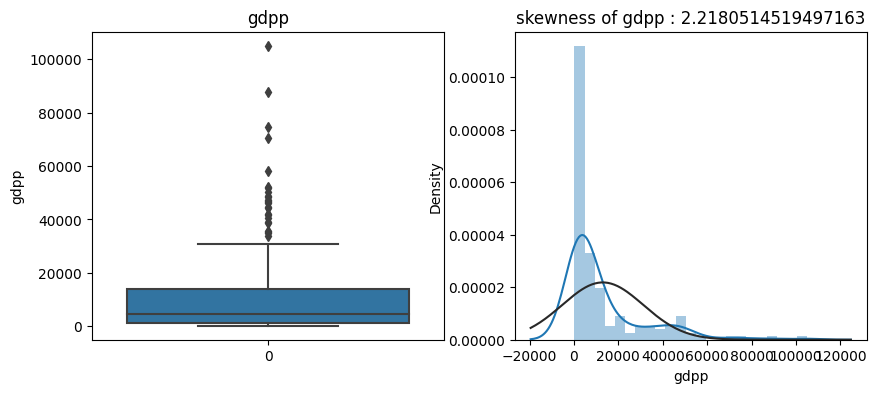

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Extracting numerical columns from the dataset

# Setting up the plot style

from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_variables_df.columns if var not in ["Date"]]

# Plotting Box and Distribution plot
for var in num_var:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

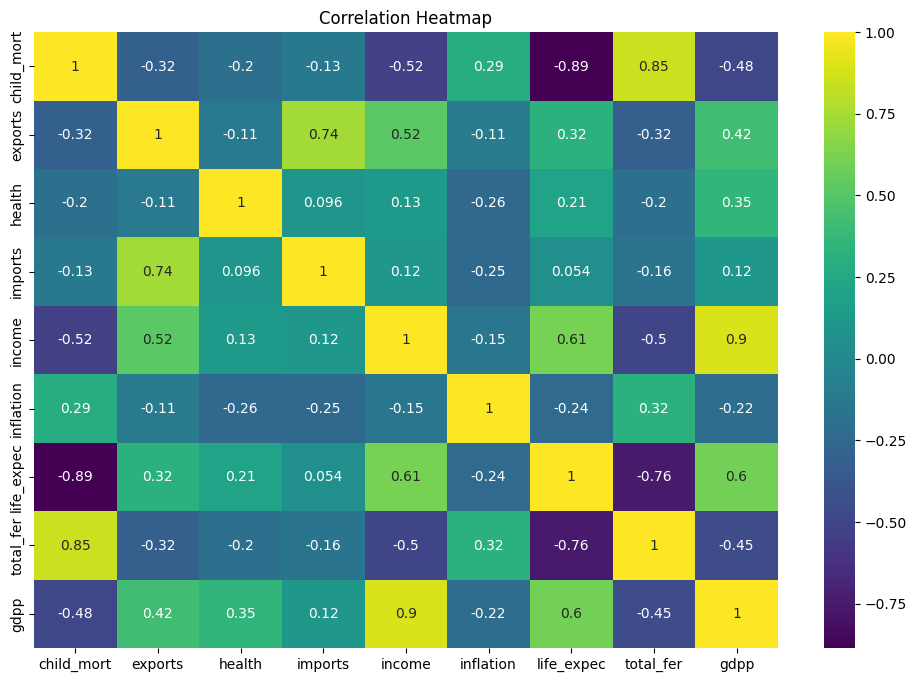

In [6]:
# Calculating the correlation matrix
selected_components = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = selected_components.corr()
# Plotting the heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

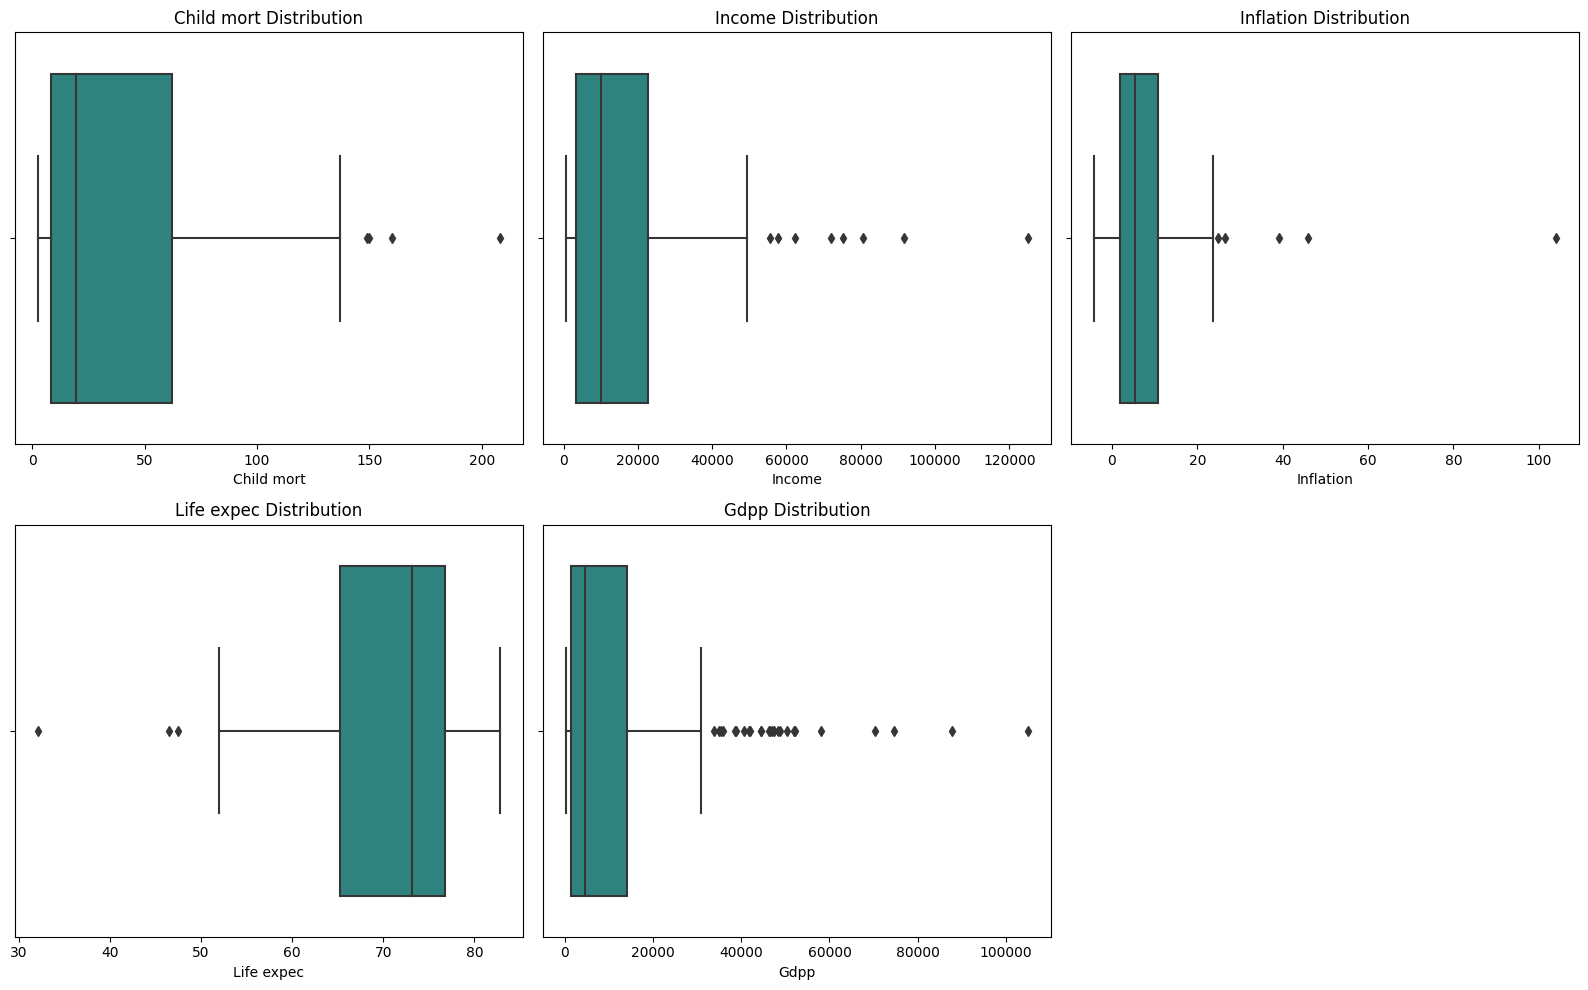

In [7]:
# Plotting boxplots for key variables to identify outliers
plt.figure(figsize=(16, 10))
key_variables = ['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']
for i, variable in enumerate(key_variables):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[variable], palette='viridis')
    plt.title(f'{variable.replace("_", " ").capitalize()} Distribution')
    plt.xlabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

Performing PCA
Next, we'll perform Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and understand the main components that explain the most variance in the data. Before applying PCA, we'll scale the data to have zero mean and unit variance, as PCA is sensitive to the magnitude of the variables. Let's begin by scaling the data and applying PCA.

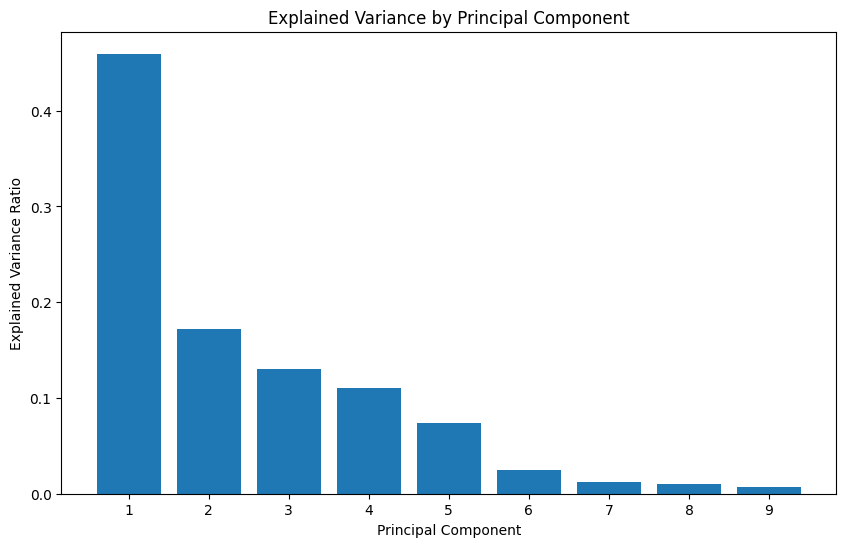

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extracting the numerical features
numerical_features = df.drop('country', axis=1)

# Scaling the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

# Getting the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
cumulative_explained_variance

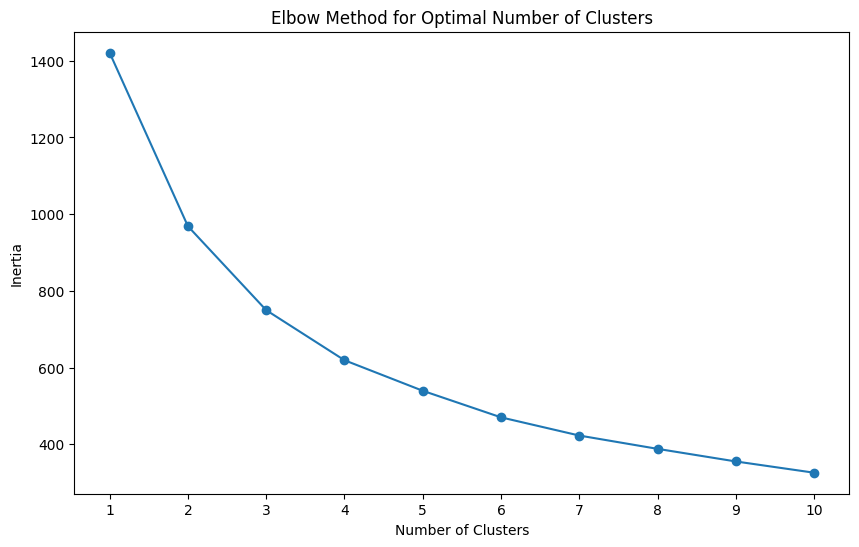

In [9]:
from sklearn.cluster import KMeans

# Selecting the first 5 principal components
selected_components = principal_components[:, :5]

# Determining the optimal number of clusters using the Elbow method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_components)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

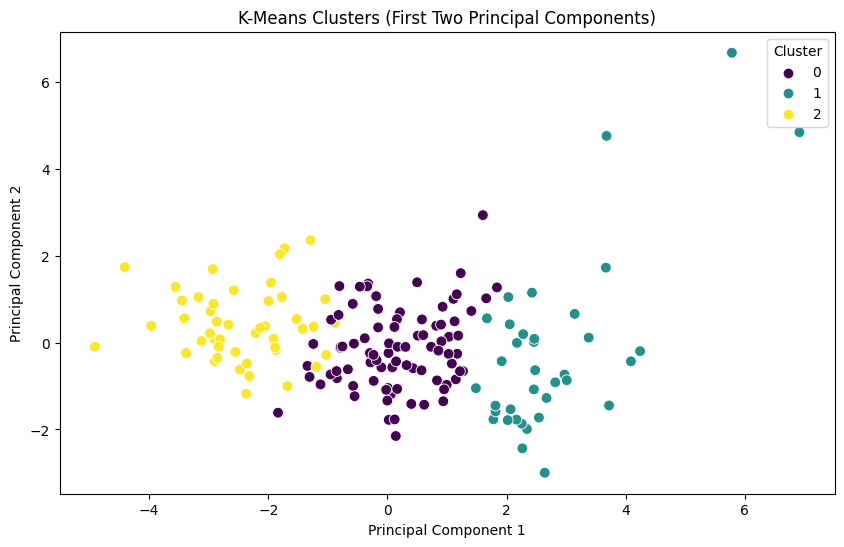

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979


In [10]:

# Ensure that only numeric columns are used for clustering
# selected_components = df.select_dtypes(include=['int64', 'float64'])
# Fitting K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(selected_components)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualizing the clusters using the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('K-Means Clusters (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Checking the mean values of features for each cluster
cluster_summary =df.groupby('Cluster').mean()
cluster_summary

In [11]:
import plotly.express as px
# Mapping hierarchical cluster labels to descriptive labels
cluster_map = { 0: 'Cluster_0', 1: 'Cluster_1',2: 'Cluster_2'}
# Applying the mapping to the 'hierarchical_cluster' column
df['cluster_label'] = df['Cluster'].map(cluster_map)
# Creating a choropleth map
fig = px.choropleth(df[['country', 'cluster_label']],
                    locations=df['country'],
                    locationmode='country names',
                    color=df['cluster_label'],
                    color_discrete_map={'Cluster_0':'cyan', 'Cluster_1':'gold', 'Cluster_2':'red'},
                    projection='orthographic')
fig.show()

In [12]:
# Listing the countries in each cluster
countries_in_clusters = df.groupby('Cluster')['country'].apply(list)

# Displaying the countries for each cluster
countries_in_clusters

Cluster
0    [Albania, Algeria, Antigua and Barbuda, Argent...
1    [Australia, Austria, Bahrain, Belgium, Brunei,...
2    [Afghanistan, Angola, Benin, Botswana, Burkina...
Name: country, dtype: object

**Cluster 0 (developing countries)**: Includes nations like Albania, Algeria, Argentina, Armenia, Azerbaijan, Bangladesh, Belarus, Bolivia, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Czech Republic, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Greece, Guatemala, Hungary, India, Indonesia, Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lithuania, Macedonia, Malaysia, Maldives, Malta, Mauritius, Mexico, Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Singapore, Slovak Republic, Slovenia, South Africa, South Korea, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, United Arab Emirates, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam.

**Cluster 1 (Developed Countries)**: Includes nations like Australia, Austria, Bahrain, Belgium, Brunei, Canada, Cyprus, Denmark, Finland, France, Germany, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg, Netherlands, New Zealand, Norway, Qatar, Spain, Sweden, Switzerland, United Kingdom, United States.

**Cluster 2 (underdeveloped Countries):** Includes nations like Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Solomon Islands, South Sudan, Sudan, Swaziland, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia, Zimbabwe. These lists provide specific insights into the categorization of countries and can be used by policymakers, economists, and organizations to tailor strategies, investments, and initiatives according to the developmental stage and challenges faced by each group of countries.



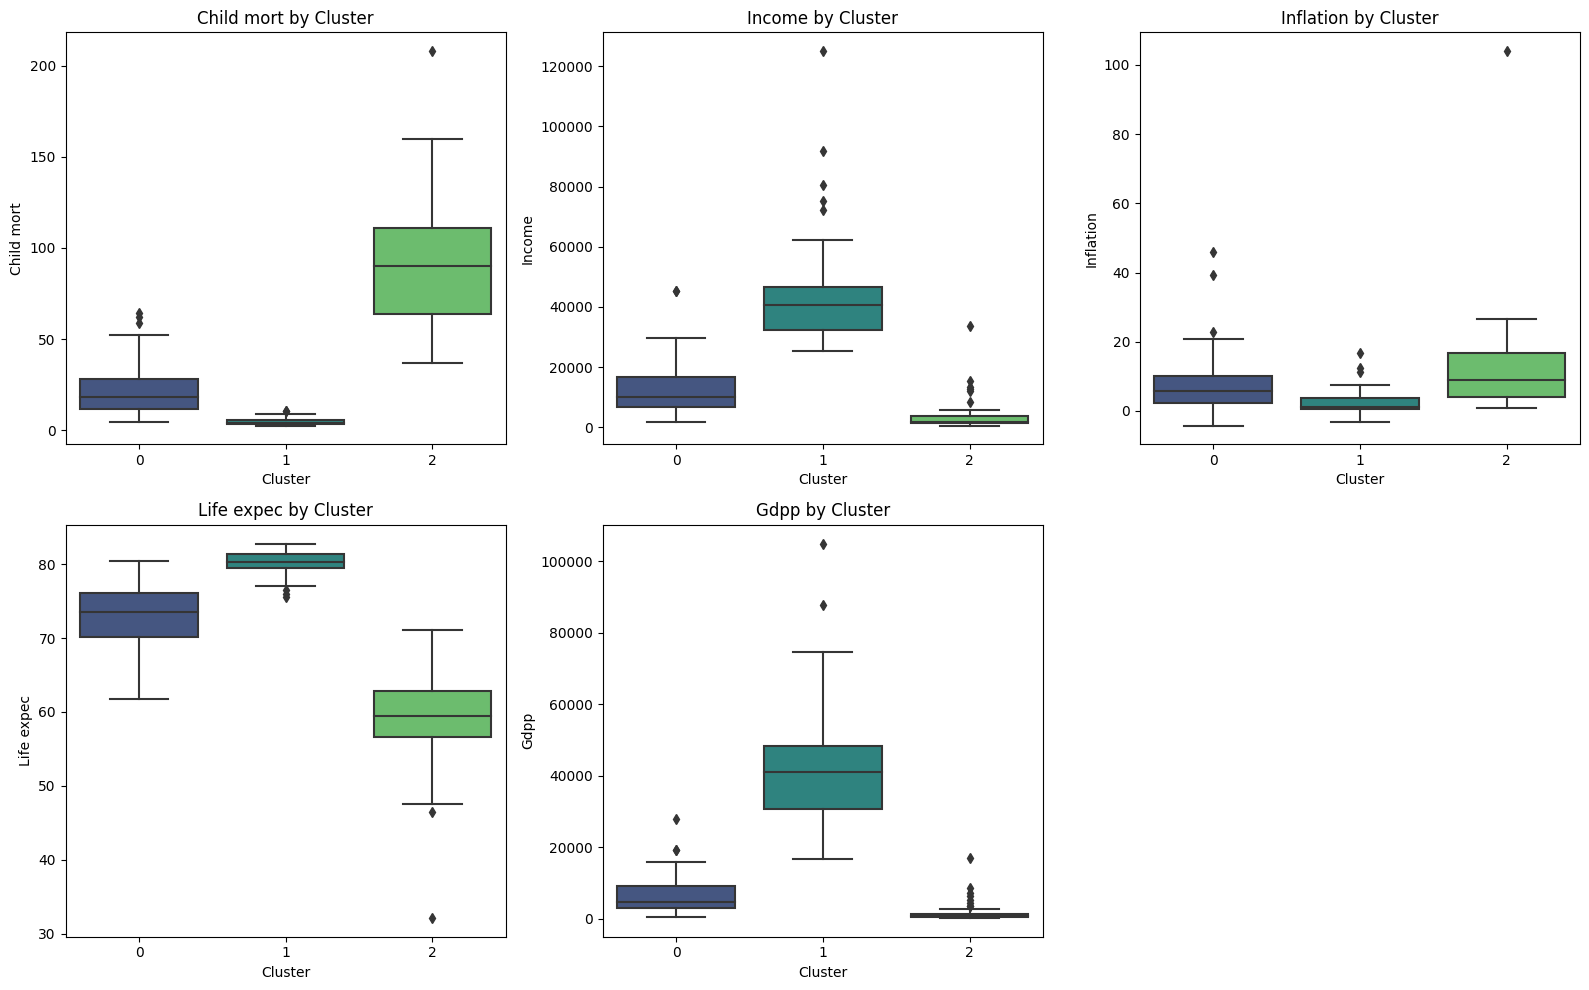

In [13]:
# Visualizing clusters for key variables
key_variables = ['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']

plt.figure(figsize=(16, 10))

for i, variable in enumerate(key_variables):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Cluster', y=variable, data=df, palette='viridis')
    plt.title(f'{variable.replace("_", " ").capitalize()} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

Cluster Visualization Summary:
The boxplots above provide a clear visual representation of how the clusters differ in key variables:

Child Mortality:
Cluster 0 (Intermediate): Moderate child mortality.
Cluster 1 (Developed): Very low child mortality.
Cluster 2 (Developing): High child mortality.
Income:
Cluster 0: Moderate income.
Cluster 1: High income.
Cluster 2: Low income.
Inflation:
Cluster 0: Moderate inflation.
Cluster 1: Low inflation.
Cluster 2: High inflation.
Life Expectancy:
Cluster 0: Moderate life expectancy.
Cluster 1: High life expectancy.
Cluster 2: Low life expectancy.
GDP per Capita:
Cluster 0: Moderate GDP per capita.
Cluster 1: High GDP per capita.
Cluster 2: Low GDP per capita.

These visualizations confirm our earlier summary of clusters and provide an intuitive understanding of the differences between developed, developing, and intermediate countries.




### Hierarchical Clustering



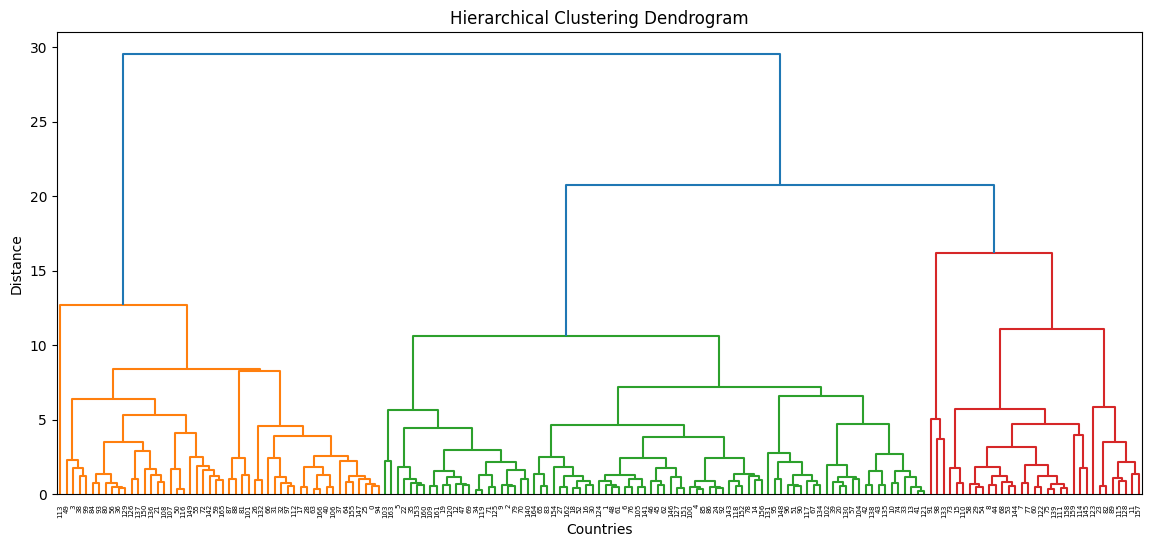

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
Hierarchical_Cluster,,,,,,,,,,
0,6.003030,59.221212,8.527576,49.387879,48133.333333,4.186576,79.939394,1.853939,43551.515152,0.909091
1,90.034000,28.860380,6.499600,43.029318,3882.660000,11.651500,59.514000,4.909800,1909.800000,1.880000
2,20.134524,41.284286,6.331310,48.207143,12864.642857,6.890881,73.441667,2.210000,7527.666667,0.071429


In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing hierarchical clustering using the "ward" method
linked = linkage(selected_components, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(14, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

# Applying Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(selected_components)

# Adding the hierarchical cluster labels to the original dataframe
df['Hierarchical_Cluster'] = agg_clusters

# Checking the mean values of features for each hierarchical cluster
hierarchical_cluster_summary = df.groupby('Hierarchical_Cluster').mean()
hierarchical_cluster_summary

In [15]:
cluster_map = { 0: 'Cluster_0', 1: 'Cluster_1',2: 'Cluster_2'}# Mapping hierarchical cluster labels to descriptive labels
df['cluster_label'] = df['Hierarchical_Cluster'] .map(cluster_map)# Applying the mapping to the 'hierarchical_cluster' column
fig = px.choropleth(df[['country', 'cluster_label']], # Creating a choropleth map
                    locations=df['country'],
                    locationmode='country names',
                    color=df['cluster_label'],
                    color_discrete_map={'Cluster_0':'cyan', 'Cluster_1':'gold', 'Cluster_2':'red'},
                    projection='orthographic')
fig.show()

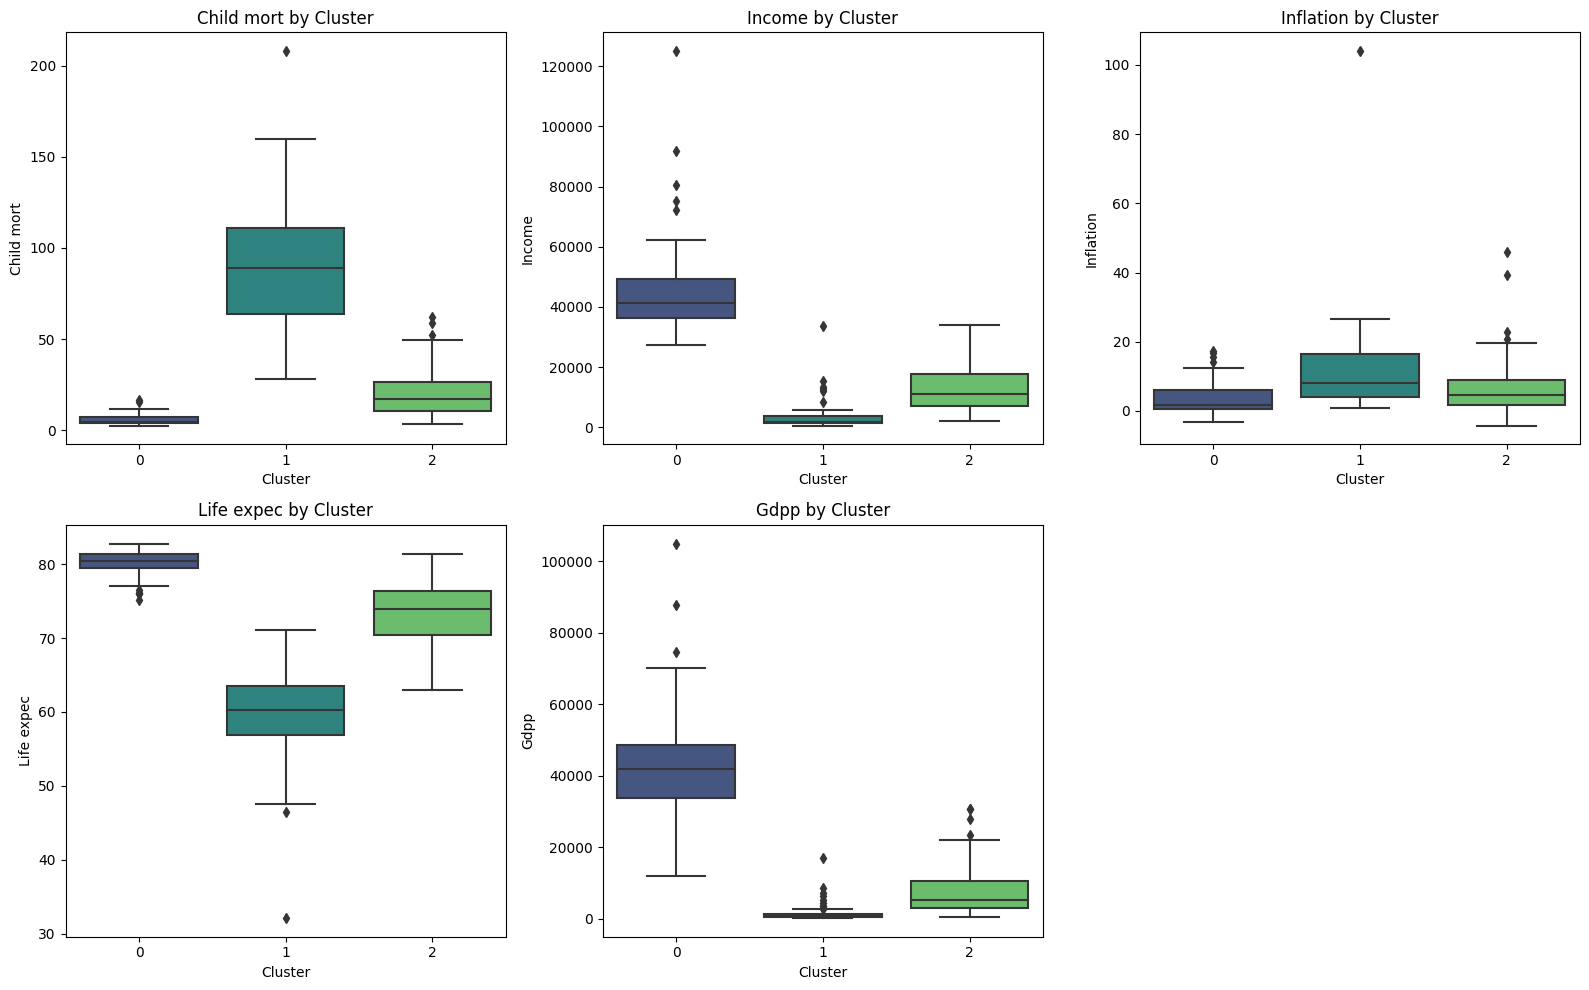

In [16]:
# Visualizing clusters for key variables
key_variables = ['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']

plt.figure(figsize=(16, 10))

for i, variable in enumerate(key_variables):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Hierarchical_Cluster', y=variable, data=df, palette='viridis')
    plt.title(f'{variable.replace("_", " ").capitalize()} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variable.replace("_", " ").capitalize())

plt.tight_layout()
plt.show()

Hierarchical Clustering Summary:
We grouped the countries into three clusters using hierarchical clustering, and the characteristics of each cluster are as follows:

Cluster 0 (Developed Countries):
Child Mortality: Low (6.00)
Income: High (48,133.33)
Inflation: Moderate (4.19)
Life Expectancy: High (79.94)
GDP per Capita: High (43,551.52)
Cluster 1 (Developing Countries):
Child Mortality: High (90.03)
Income: Low (3,882.66)
Inflation: High (11.65)
Life Expectancy: Low (59.51)
GDP per Capita: Low (1,909.80)
Cluster 2:
Child Mortality: Moderate (20.13)
Income: Moderate (12,864.64)
Inflation: Moderate (6.89)
Life Expectancy: Moderate (73.44)
GDP per Capita: Moderate (7,527.67)
The results are similar to K-Means clustering, and we have successfully categorized countries into developed, developing, and intermediate groups.

### Comparison of K-Means and Hierarchical Clustering



In [17]:
# Cross-tabulation of K-Means and Hierarchical Clusters
cluster_comparison = pd.crosstab(df['Cluster'], df['Hierarchical_Cluster'], margins=True)
cluster_comparison.columns.name = 'Hierarchical Clustering'
cluster_comparison.index.name = 'K-Means Clustering'
cluster_comparison


Hierarchical Clustering,0,1,2,All
K-Means Clustering,,,,
0,3,3,78,84
1,30,0,6,36
2,0,47,0,47
All,33,50,84,167


Cluster Comparison Summary:
We clustered the countries using both K-Means and Hierarchical Clustering. Let's compare the clusters obtained from these two methods to see if there are any significant differences or similarities.

The cross-tabulation table provides a comparison between the clusters obtained from K-Means and Hierarchical Clustering:

K-Means Cluster 0: Mostly corresponds to Hierarchical Cluster 2 (78 out of 84 countries).
K-Means Cluster 1: Mostly corresponds to Hierarchical Cluster 0 (30 out of 36 countries).
K-Means Cluster 2: Completely corresponds to Hierarchical Cluster 1 (47 out of 47 countries).
There is a strong alignment between the clusters obtained from both methods, with some differences in the categorization of a few countries.

### Detect Outliers by Regions

In [18]:
columns=['child_mort','exports','health','imports','income','inflation','life_expec','gdpp']
for cols in columns:
    print(f'\n detect outliers related to {cols} \n ')
    # Identifying outliers for child mortality
    outliers = df[df[cols] > df[cols].quantile(0.95)]
    # Sorting by child mortality rat
    outliers = outliers.sort_values(by=cols, ascending=False)
    # Displaying the top 5 countries with the highest child mortality rate
    display(outliers.head())

    # Creating a choropleth map
    fig = px.choropleth(outliers,
                    locations=outliers['country'],
                    locationmode='country names',
                    color=outliers['Cluster'], # Specify the column for color mapping
                    color_continuous_scale='Reds', # Using a continuous red color scale
                    projection='orthographic')
    # Displaying the map
    fig.show()



 detect outliers related to child_mort 
 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_label,Hierarchical_Cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2,Cluster_1,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2,Cluster_1,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2,Cluster_1,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2,Cluster_1,1
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2,Cluster_1,1



 detect outliers related to exports 
 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_label,Hierarchical_Cluster
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,Cluster_0,0
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,Cluster_0,0
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1,Cluster_0,0
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,1,Cluster_0,0
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,0,Cluster_2,2



 detect outliers related to health 
 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_label,Hierarchical_Cluster
159,United States,7.3,12.4,17.9,15.8,49400,1.220,78.7,1.93,48400,1,Cluster_0,0
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.800,65.4,3.46,2860,0,Cluster_1,1
132,Sierra Leone,160.0,16.8,13.1,34.5,1220,17.200,55.0,5.20,399,2,Cluster_1,1
54,France,4.2,26.8,11.9,28.1,36900,1.050,81.4,2.03,40600,1,Cluster_0,0
110,Netherlands,4.5,72.0,11.9,63.6,45500,0.848,80.7,1.79,50300,1,Cluster_0,0



 detect outliers related to imports 
 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_label,Hierarchical_Cluster
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,Cluster_0,0
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1,Cluster_0,0
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,Cluster_0,0
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,0,Cluster_2,2
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170,2,Cluster_1,1



 detect outliers related to income 
 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_label,Hierarchical_Cluster
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1,Cluster_0,0
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,Cluster_0,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1,Cluster_0,0
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1,Cluster_0,0
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,Cluster_0,0



 detect outliers related to inflation 
 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_label,Hierarchical_Cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,2,Cluster_1,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500,0,Cluster_2,2
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650,0,Cluster_2,2
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600,2,Cluster_1,1
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100,2,Cluster_1,1



 detect outliers related to life_expec 
 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_label,Hierarchical_Cluster
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500,1,Cluster_0,0
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,Cluster_0,0
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1,Cluster_0,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,Cluster_0,0
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,1,Cluster_0,0



 detect outliers related to gdpp 
 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,cluster_label,Hierarchical_Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,Cluster_0,0
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1,Cluster_0,0
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1,Cluster_0,0
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1,Cluster_0,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1,Cluster_0,0


**Analyzing Outliers in Detail**:
Since we identified potential outliers in key variables, we'll analyze these outliers in detail to understand which countries they represent and the underlying factors that might be contributing to these extreme values.\
 We'll identify the countries that are outliers in terms of child mortality, income, inflation, life expectancy, and GDP per capita, and analyze them in detail.

  **Child Mortality Outliers** We'll start by identifying countries with exceptionally high child mortality rates. - Haiti: Child mortality rate of 208.0 - Sierra Leone: Child mortality rate of 160.0 - Chad: Child mortality rate of 150.0 - Central African Republic: Child mortality rate of 149.0 - Mali: Child mortality rate of 137.0 These countries fall within Cluster 2, representing developing countries with low income, GDP per capita, and life expectancy. The high child mortality rates in these countries may be associated with challenges in healthcare, nutrition, sanitation, and socio-economic factors.

  **Income Outliers** Identifying the countries with exceptionally high income levels. - Qatar: Income of 125,000 - Luxembourg: Income of 91,700 - Brunei: Income of 80,600 - Kuwait: Income of 75,200 - Singapore: Income of 72,100 These countries fall within Cluster 1, representing developed countries with low child mortality, high life expectancy, and high GDP per capita. The high income in these countries may be driven by factors such as natural resources (e.g., oil in Qatar and Kuwait), financial services (e.g., Luxembourg), and advanced industries (e.g., Singapore).
  
  ** Inflation Outliers** - Nigeria: Inflation rate of 104.0 - Venezuela: Inflation rate of 45.9 - Mongolia: Inflation rate of 39.2 - Timor-Leste: Inflation rate of 26.5 - Equatorial Guinea: Inflation rate of 24.9 These inflation outliers represent a mix of clusters. The exceptionally high inflation rates may be associated with economic instability, fiscal policies, external debts, and other macroeconomic factors.

   **Life Expectancy Outliers** Identifying the countries with exceptionally high life expectancy. - Japan: 82.8 - Singapore: 82.7 - Switzerland: 82.2 - Australia: 82.0 - Iceland: 82.0 All of these countries related to cluster 0 , life expectancy is very high in developed countries. #### GDP per Capita Outliers Identifying the countries with exceptionally high GDP per capita. - Luxembourg: GDP per capita of 105,000 - Norway: GDP per capita of 87,800 - Switzerland: GDP per capita of 74,600 - Qatar: GDP per capita of 70,300 - Denmark: GDP per capita of 58,000 These countries fall within Cluster 1, representing developed countries. The high GDP per capita may be attributed to advanced industries, robust financial systems, natural resources, and a high standard of living.




**Conclusion of Outlier Analysis**:
The analysis of outliers has revealed specific countries that stand out in terms of child mortality, income, inflation, life expectancy, and GDP per capita. Understanding these outliers provides insights into unique economic and health situations and can guide targeted interventions, policies, or further research.




### **Final Conclusion**

In this comprehensive analysis, we performed Preprocessing and Visualization steps, Principal Component Analysis (PCA), K-Means Clustering, and Hierarchical Clustering on the country data. We identified three main groups of countries with distinct economic and health characteristics:

**Developed Countries**: Characterized by high income, high GDP per capita, low child mortality, and high life expectancy.

**under developed**: Characterized by low income, low GDP per capita, high child mortality, and low life expectancy.

**developing**: Situated between developed and underdeveloped countries in terms of economic and health indicators.